## Weather Prediction Using Logistic Regression

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

#### loading dataset

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Counting the features

In [3]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
print(f'numerical feature: {len(numerical_feature)}')
print(numerical_feature)

numerical feature: 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [4]:
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25]
print(f'discrete feature: {len(discrete_feature)}')
print(discrete_feature)

discrete feature: 2
['Cloud9am', 'Cloud3pm']


In [5]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print(f'continuous feature: {len(continuous_feature)}')
print(continuous_feature)

continuous feature: 14
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [6]:
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print(f'categorical feature: {len(categorical_feature)}')
print(categorical_feature)

categorical feature: 7
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [7]:
# drop some unwanted columns
data = data.drop(['Date'], axis=1)

### Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

#### Replacing Null Values With Most_frequents Values

In [9]:
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
SI = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for feature in data.columns:
    data[[feature]] = SI.fit_transform(data[[feature]])

In [11]:
#from sklearn.impute import SimpleImputer
#SI = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#data[['Location']] = SI.fit_transform(data[['Location']])
#etx........

## Data Visualization

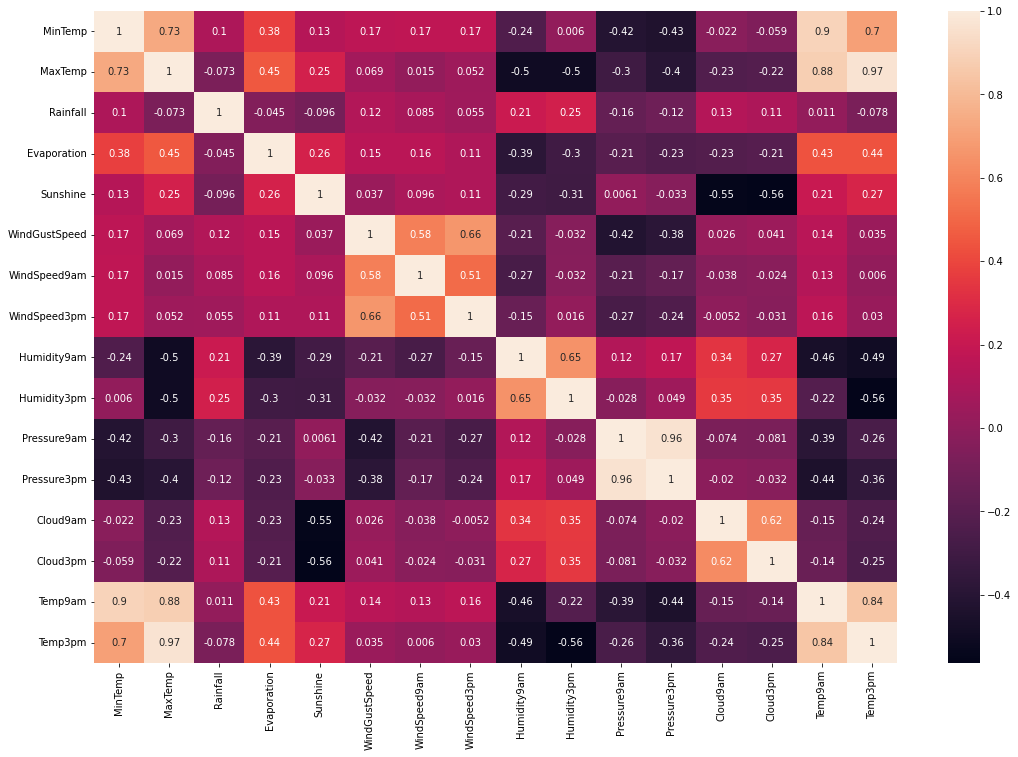

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Plotting Continuous Values

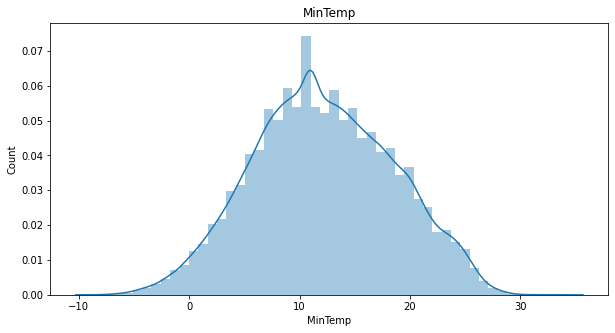

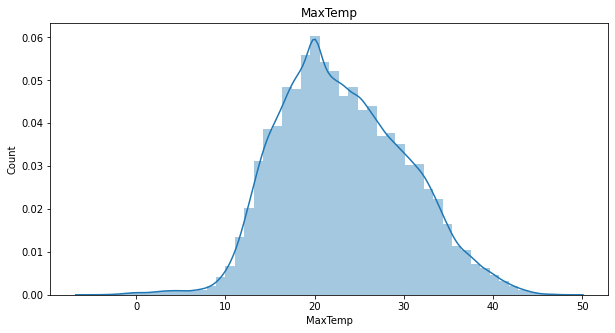

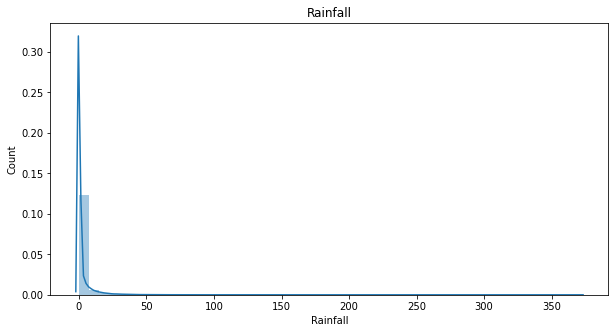

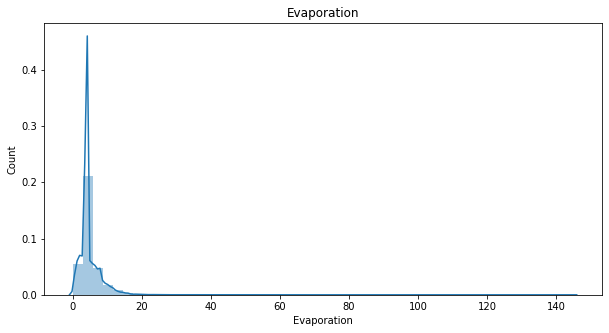

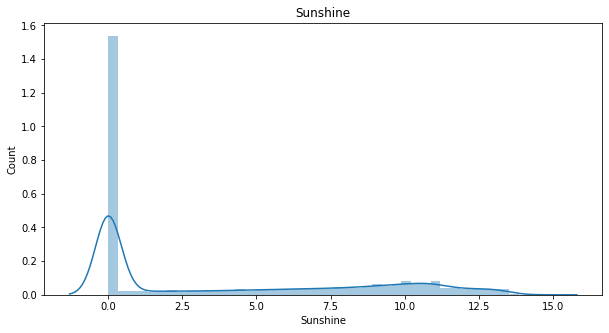

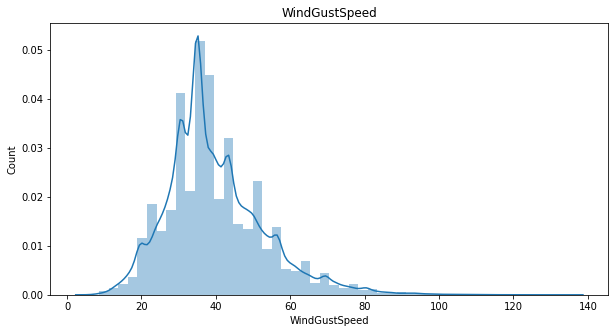

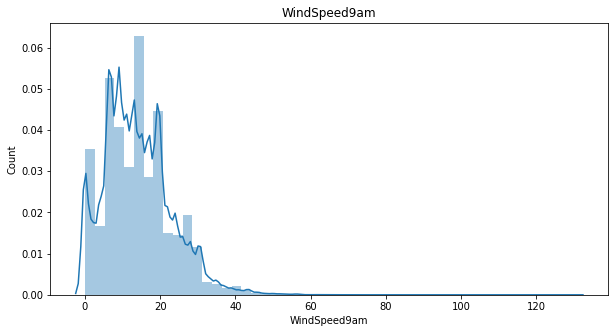

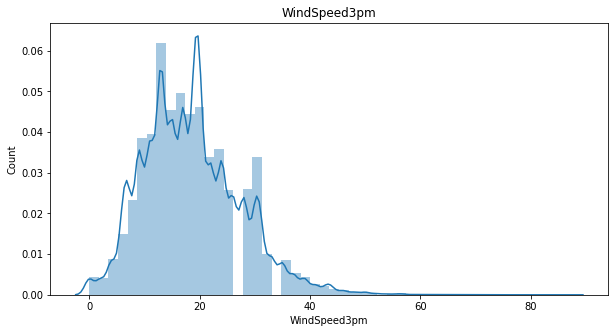

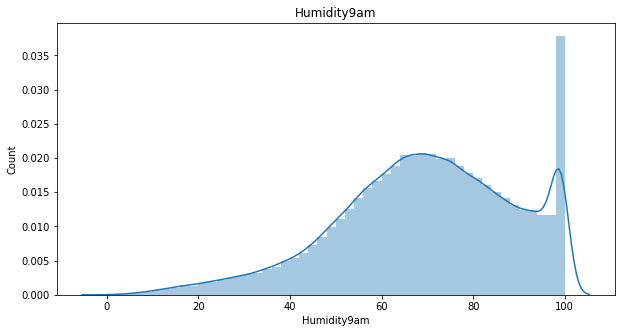

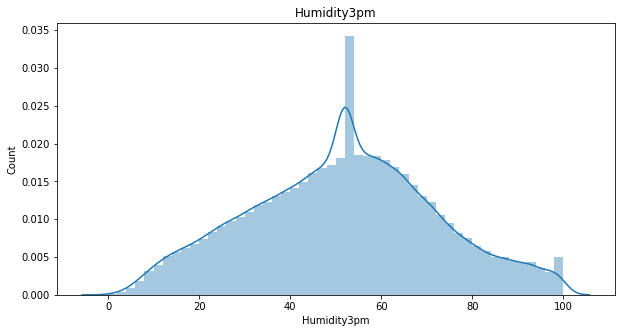

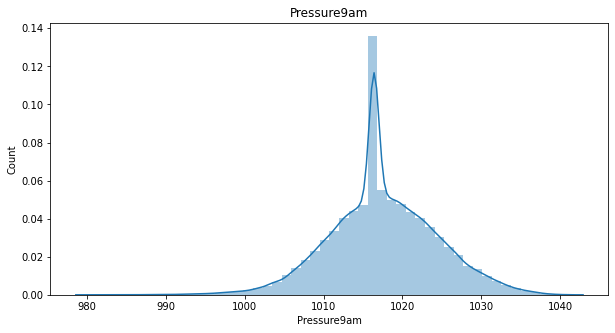

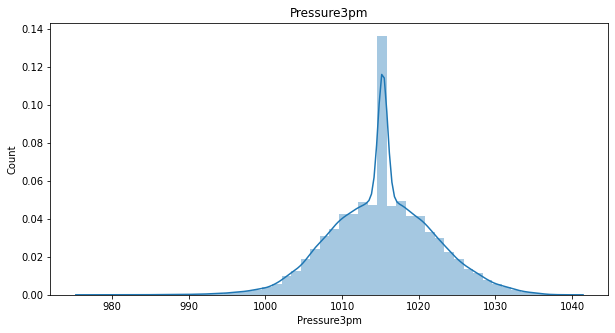

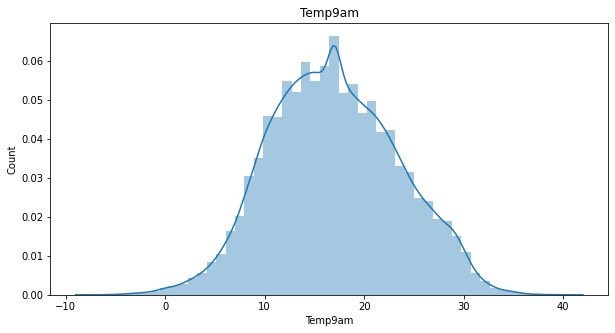

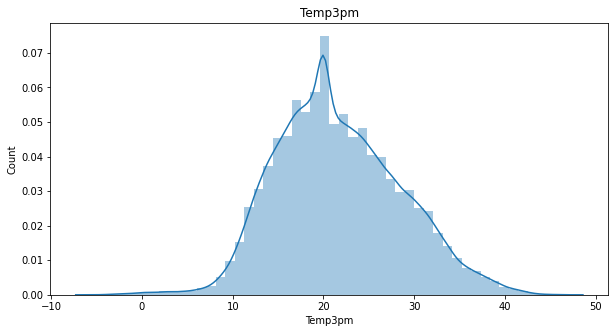

In [13]:

for features in continuous_feature:
    df = data.copy()
    plt.figure(figsize=(10,5))
    sns.distplot(df[features], kde=True)     # kde is drawing lines from cenntre point of each values
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title(features)
plt.show()

### Plotting Categorical Values

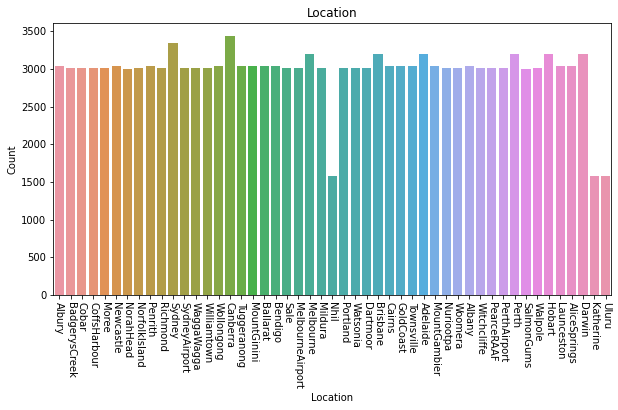

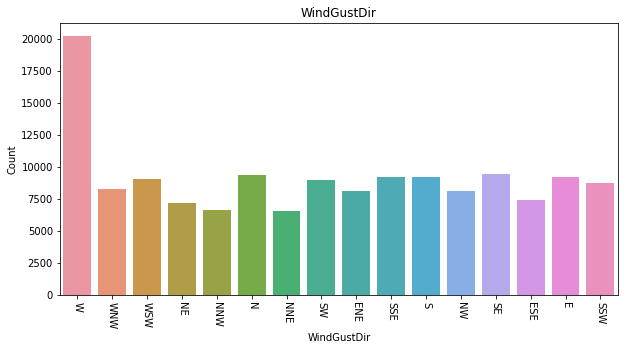

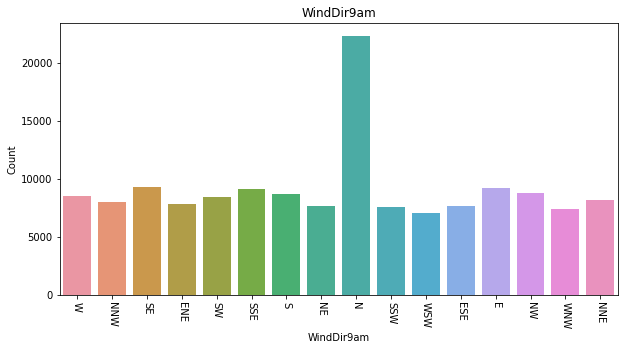

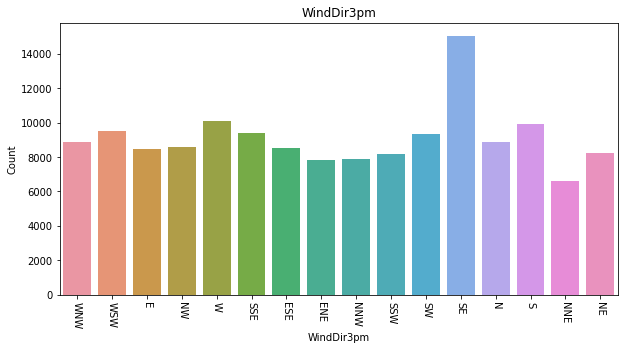

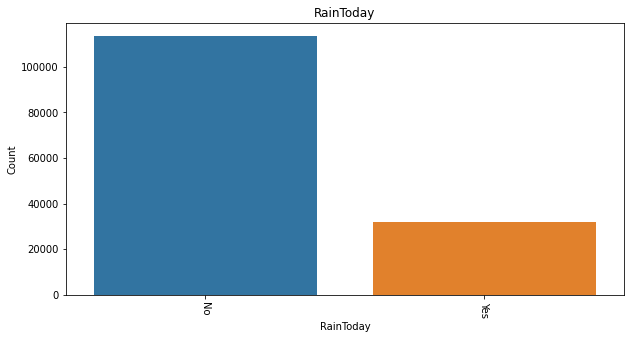

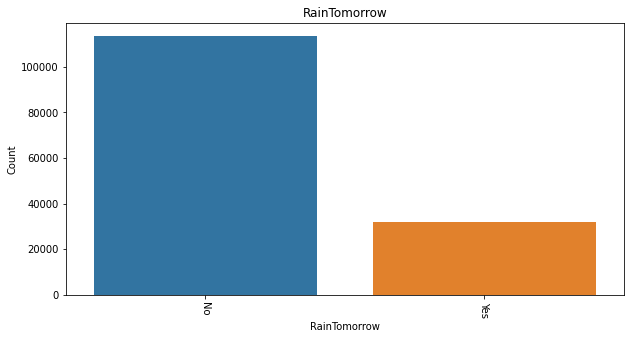

In [14]:
for features in categorical_feature:
    if features != 'Date':
        df = data.copy()
        plt.figure(figsize=(10,5))
        sns.countplot(df[features])
        plt.xlabel(features)
        plt.xticks(rotation=270)
        plt.ylabel('Count')
        plt.title(features)
plt.show()

### Cleaning Invalid Datasets

In [15]:
# change string value into numerical values
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for encoder in data.columns:
    if data[encoder].dtypes == 'O':
        data[encoder] = LE.fit_transform(data[encoder])

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
# change string value into numerical values
# from sklearn.preprocessing import LabelEncoder
#Le1 = LabelEncoder()
#data['Location'] = Le1.fit_transform(data['Location'])
#Le2 = LabelEncoder()
#data['WindGustDir'] = Le2.fit_transform(data['WindGustDir'])
#Le3 = LabelEncoder()
#data['WindDir9am'] = Le3.fit_transform(data['WindDir9am'])
#Le4 = LabelEncoder()
#data['WindDir3pm'] = Le4.fit_transform(data['WindDir3pm'])
#Le5 = LabelEncoder()
#data['RainToday'] = Le5.fit_transform(data['RainToday'])

### Feature Scalling

In [18]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)

### Train Model With Given Dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10, solver='sag', intercept_scaling=2)
model.fit(X_train, y_train)

LogisticRegression(intercept_scaling=2, max_iter=10, solver='sag')

In [21]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('score :', accuracy_score(y_pred, y_test))
print('confusion marix :\n', confusion_matrix(y_pred, y_test))
print('classification report :\n', classification_report(y_pred, y_test))

score : 0.8428777670837344
confusion marix :
 [[21592  3437]
 [ 1134  2929]]
classification report :
               precision    recall  f1-score   support

           0       0.95      0.86      0.90     25029
           1       0.46      0.72      0.56      4063

    accuracy                           0.84     29092
   macro avg       0.71      0.79      0.73     29092
weighted avg       0.88      0.84      0.86     29092



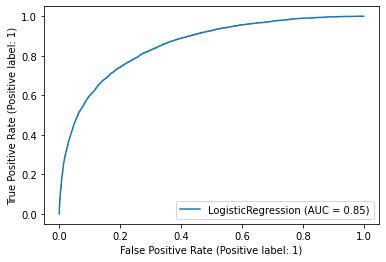

In [22]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)

## DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=30, max_features='sqrt')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=30)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
result = accuracy_score(y_pred, y_test)
print('Accuracy score :', result)
result1 = classification_report(y_pred, y_test)
print('classification report :\n', result1)
result2 = confusion_matrix(y_pred, y_test)
print('confusion matrix :\n', result2)

Accuracy score : 0.8322219166781246
classification report :
               precision    recall  f1-score   support

           0       0.93      0.86      0.90     24651
           1       0.47      0.67      0.55      4441

    accuracy                           0.83     29092
   macro avg       0.70      0.76      0.72     29092
weighted avg       0.86      0.83      0.84     29092

confusion matrix :
 [[21248  3403]
 [ 1478  2963]]


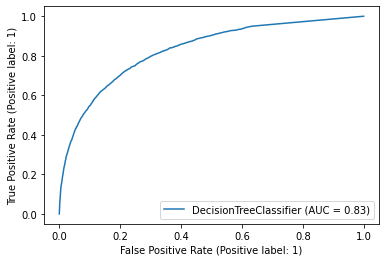

In [26]:
metrics.plot_roc_curve(classifier, X_test, y_test)

## RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=5, max_samples=100, random_state=5,
                                    min_impurity_decrease=0, max_leaf_nodes=5, min_samples_leaf= 15)

In [28]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy score :', accuracy_score(y_pred, y_test))
print('confusion matrix :\n', confusion_matrix(y_pred, y_test))
print('classification report :\n', classification_report(y_pred, y_test))

Accuracy score : 0.8341812182043173
confusion matrix :
 [[21232  3330]
 [ 1494  3036]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.86      0.90     24562
           1       0.48      0.67      0.56      4530

    accuracy                           0.83     29092
   macro avg       0.71      0.77      0.73     29092
weighted avg       0.86      0.83      0.84     29092



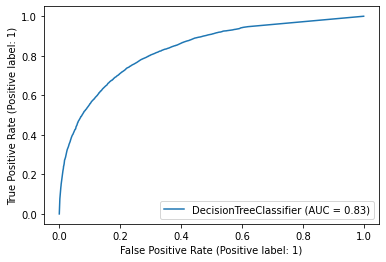

In [30]:
metrics.plot_roc_curve(classifier, X_test, y_test)

In [36]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
nav_bayes = BernoulliNB()
nav_bayes.fit(X_train, y_train)

BernoulliNB()

In [37]:
pred = nav_bayes.predict(X_test)

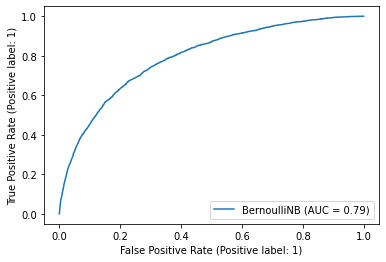

In [43]:
accuracy_score(pred, y_test)
metrics.plot_roc_curve(nav_bayes,X_test, y_test)

In [39]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
pred = gauss.predict(X_test)

In [40]:
accuracy_score(pred, y_test)

0.794995187680462

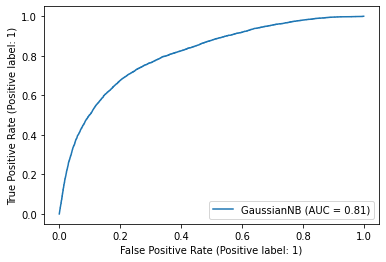

In [44]:
metrics.plot_roc_curve(gauss, X_test, y_test)